# **Acerca de Bellabeat**


Bellabeat es una empresa de alta tecnología fundada en 2013 que fabrica productos inteligentes enfocados en el cuidado de la salud de las mujeres. Sus productos están diseñados para ofrecer información detallada sobre la actividad física, el sueño, el estrés y la salud reproductiva, ayudando a las mujeres a tomar decisiones más informadas sobre su bienestar.

Algunos de sus productos son:

* App Bellabeat: recopila y visualiza los datos registrados.
* Leaf, Time y Spring: dispositivos de monitoreo conectados a la app.
* Membresía Bellabeat: programa de suscripción que ofrece orientación personalizada.

# **Tarea empresarial**

Desarrollar nuevas oportunidades de mercado para los productos existentes, fundamentándose en el análisis de datos recopilados de dispositivos de similares características.

**Interrogantes a resolver**

1. ¿Cuáles son algunas tendencias de uso de los dispositivos inteligentes?
2. ¿Cómo se podrían aplicar estas tendencias a los clientes de Bellabeat?
3. ¿Cómo podrían ayudar estas tendencias a influir en la estrategia de marketing de Bellabeat?


# **Importar paquetes**

In [1]:
library(tidyverse)
library(readr)
library(ggplot2)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# **Importar conjuntos de datos**

Para este análisis utilizaremos el conjunto de datos de [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/haseeb85/fitbit-fitness-tracker-data). El mismo contiene el seguimiento de actividad física de 30 usuarios de FitBit, designados aleatoriamente. 

In [2]:
Resumen_actividad  <- read_csv("../input/fitbit-fitness-tracker-data/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
Calorias_hora <- read_csv("../input/fitbit-fitness-tracker-data/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
Intensidad_hora <- read_csv("../input/fitbit-fitness-tracker-data/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
Reposo <- read_csv("../input/fitbit-fitness-tracker-data/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
Peso <- read_csv("../input/fitbit-fitness-tracker-data/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (3): Id, TotalIntensity, AverageIntensity

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_ty

# **Explorar conjuntos de datos**

Mediante la utilización de las funciones head() o View() verificaremos que los conjuntos de datos se hayan cargado correctamente.

In [3]:
head(Resumen_actividad)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Al verificar, descubrimos que las columnas fecha y fecha/hora se encuentran configuradas como cadenas de texto, lo cual nos dificultará nuestro análisis más adelante.

Luego, corroboramos que las muestras sean representativas:



In [4]:
n_distinct(Resumen_actividad$Id)
n_distinct(Calorias_hora$Id)
n_distinct(Intensidad_hora$Id)
n_distinct(Reposo$Id)
n_distinct(Peso$Id)


[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

En el caso de la tabla "Peso" los datos de 8 personas no resultan representativos, por lo cual, la desestimaremos para el análisis.

# **Configurar formatos fecha/hora**

Como mencionamos anteriormente los campos fecha y fecha/hora están configurados como cadena de texto, lo cual procedemos a modificar:

In [5]:
# Actividad

Resumen_actividad$ActivityDate <- as.Date(Resumen_actividad$ActivityDate, format="%m/%d/%Y")
Resumen_actividad$day_of_the_week <- weekdays(Resumen_actividad$ActivityDate)

# Calorías

Calorias_hora$ActivityHour <- as.POSIXct(Calorias_hora$ActivityHour, format="%m/%d/%Y %I:%M:%S %p")
Calorias_hora$time <- format(Calorias_hora$ActivityHour, format = "%H:%M")
Calorias_hora$date <- format(Calorias_hora$ActivityHour, format = "%m/%d/%y")

# Intensidad

Intensidad_hora$ActivityHour <- as.POSIXct(Intensidad_hora$ActivityHour, format="%m/%d/%Y %I:%M:%S %p")
Intensidad_hora$time <- format(Intensidad_hora$ActivityHour, format = "%H:%M")
Intensidad_hora$date <- format(Intensidad_hora$ActivityHour, format = "%m/%d/%y")

# Reposo

Reposo$SleepDay <- as.POSIXct(Reposo$SleepDay, format= "%Y/%m/%d")

# **Resumir conjuntos de datos**

Previo a la visualización, examinamos las estadísticas resultantes de los conjuntos seleccionados.

In [6]:
Resumen_actividad %>%
  select(ActivityDate, TotalSteps, SedentaryMinutes, Calories) %>%
  summary()

Calorias_hora %>%
  select(date, Calories) %>%
  summary()

Intensidad_hora %>%
  select(ActivityHour, TotalIntensity) %>%
  summary()

Reposo %>%
  select(SleepDay, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

  ActivityDate          TotalSteps    SedentaryMinutes    Calories   
 Min.   :2016-04-12   Min.   :    0   Min.   :   0.0   Min.   :   0  
 1st Qu.:2016-04-19   1st Qu.: 3790   1st Qu.: 729.8   1st Qu.:1828  
 Median :2016-04-26   Median : 7406   Median :1057.5   Median :2134  
 Mean   :2016-04-26   Mean   : 7638   Mean   : 991.2   Mean   :2304  
 3rd Qu.:2016-05-04   3rd Qu.:10727   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :2016-05-12   Max.   :36019   Max.   :1440.0   Max.   :4900  

     date              Calories     
 Length:22099       Min.   : 42.00  
 Class :character   1st Qu.: 63.00  
 Mode  :character   Median : 83.00  
                    Mean   : 97.39  
                    3rd Qu.:108.00  
                    Max.   :948.00  

  ActivityHour                    TotalIntensity  
 Min.   :2016-04-12 00:00:00.00   Min.   :  0.00  
 1st Qu.:2016-04-19 01:00:00.00   1st Qu.:  0.00  
 Median :2016-04-26 06:00:00.00   Median :  3.00  
 Mean   :2016-04-26 11:46:42.58   Mean   : 12.04  
 3rd Qu.:2016-05-03 19:00:00.00   3rd Qu.: 16.00  
 Max.   :2016-05-12 15:00:00.00   Max.   :180.00  

    SleepDay                     TotalMinutesAsleep TotalTimeInBed 
 Min.   :4-12-20 00:00:00.0000   Min.   : 58.0      Min.   : 61.0  
 1st Qu.:5-02-20 00:00:00.0000   1st Qu.:361.0      1st Qu.:403.0  
 Median :5-06-20 00:00:00.0000   Median :433.0      Median :463.0  
 Mean   :5-06-09 12:58:08.1999   Mean   :419.5      Mean   :458.6  
 3rd Qu.:5-09-20 00:00:00.0000   3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :5-12-20 00:00:00.0000   Max.   :796.0      Max.   :961.0  
 NA's   :252                                                       

**Algunos puntos a tener en cuenta:**

* En promedio los usuarios de FitBit pasan 991 minutos (16 horas) en el rango de actividad considerado como "sedentario". Dato que llama la atención y debería ser reducido.

* Si analizamos el promedio de pasos de los usuarios detectamos que apenas supera los 7000 pasos (7638 para ser exactos). Considerando que el rango recomendado para mantener un buen estado de salud va entre 7000 y 10000 pasos, el promedio es bajo.

* Los datos resultantes del consumo de calorías y la intensidad de actividad, van alineados a lo mencionado anteriormente, debe motivarse al usuario a elevar estos valores.

* En cuánto a la comparación tiempo en la cama vs tiempo durmiendo, resulta que en promedio 39,1 minutos los usuarios están en situación de reposo. Tiempo que podría ser aprovechado durmiendo o bien realizando alguna actividad.



# **Visualizaciones**

**Promedio de pasos según día de la semana:**

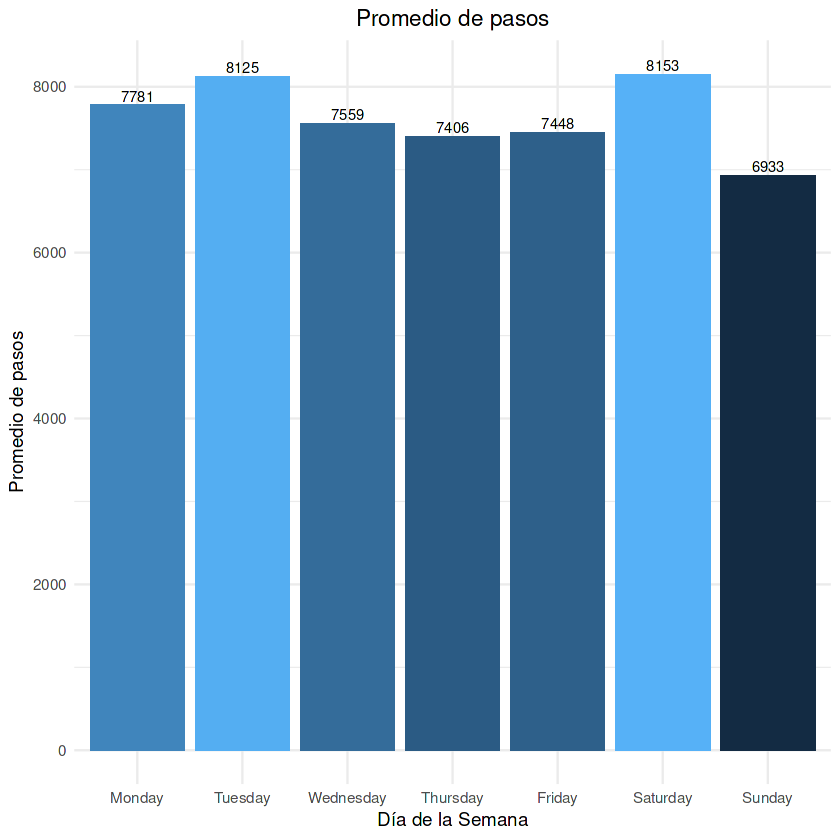

In [7]:
Promedio_por_dia <- Resumen_actividad %>%
  group_by(day_of_the_week) %>%
  summarise(promedio_steps = mean(TotalSteps, na.rm = TRUE))

Promedio_por_dia$day_of_the_week <- factor(Promedio_por_dia$day_of_the_week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

ggplot(Promedio_por_dia, aes(x = day_of_the_week, y = promedio_steps, fill = promedio_steps)) +
      geom_bar(stat = "identity") +
      geom_text(aes(label = round (promedio_steps)), vjust = -0.3, color = "black", size = 3) +
      labs(title = "Promedio de pasos", x = "Día de la Semana", y = "Promedio de pasos") +
      theme_minimal() +
      theme(plot.title = element_text(hjust = 0.5)) +
      theme(legend.position = "none")

Podemos observar que solo dos días se diferencian positivamente del promedio general. En el caso del día Domingo es el día de menor actividad, lo cual era de esperarse ya que generalmente es considerado el descanso semanal, pero a su vez, preocupa la poca diferencia con resto de los días.

**Consumo de calorías a lo largo del día**

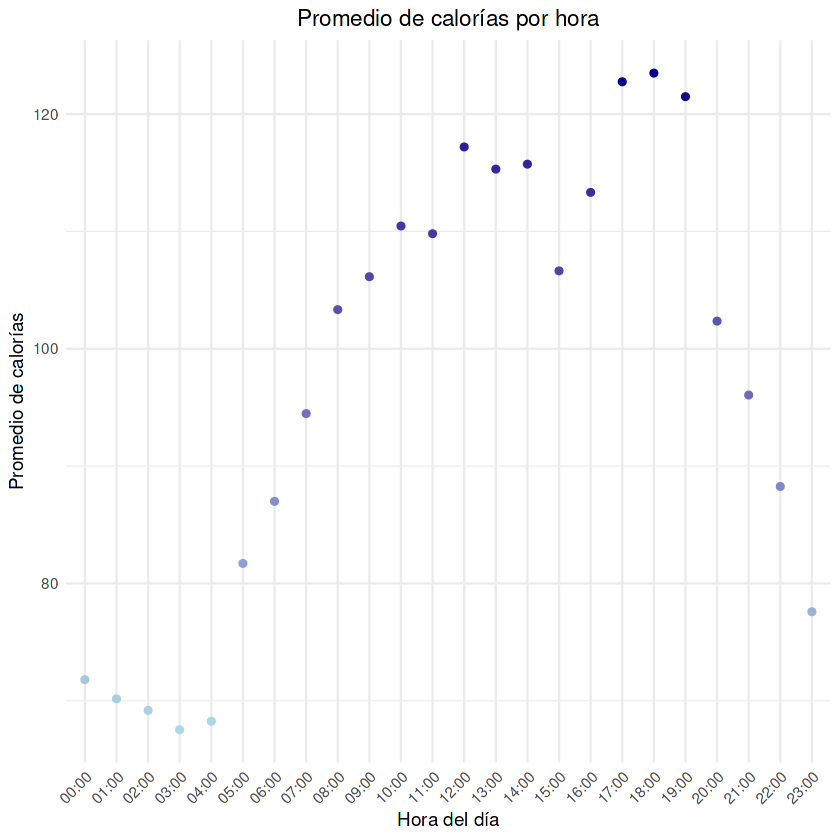

In [8]:
Relacion_calorias_hora <- Calorias_hora %>%
  group_by(time) %>%
  summarise(promedio_calories = mean(Calories, na.rm = TRUE))

ggplot(Relacion_calorias_hora, aes(x = time, y = promedio_calories, color = promedio_calories)) +
  geom_point(stat = "identity") +
  labs(title = "Promedio de calorías por hora", x = "Hora del día", y = "Promedio de calorías") +
  theme_minimal() +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)) +
  scale_color_gradient(low = "lightblue", high = "darkblue") +
  theme(plot.title = element_text(hjust = 0.5))

En la comparación podemos observar como nuestro pico de consumo calórico se da entre las 17 y las 19 horas, con lo cual podemos concluir que se da una vez finalizada la jornada laboral.
Por otro lado, el resto del día no nos brinda resultados destacables, se podría considerar que en general no existe gasto calórico intenso, por lo tanto el nivel de actividad es bajo. Recordemos que una caminata ligera puede consumir aproximadamente de 200 a 300 calorías por hora y una sesión de una hora de running (dependiendo la intensidad) de 500 a 800 calorías.

**Intensidad de actividad a lo largo del día**

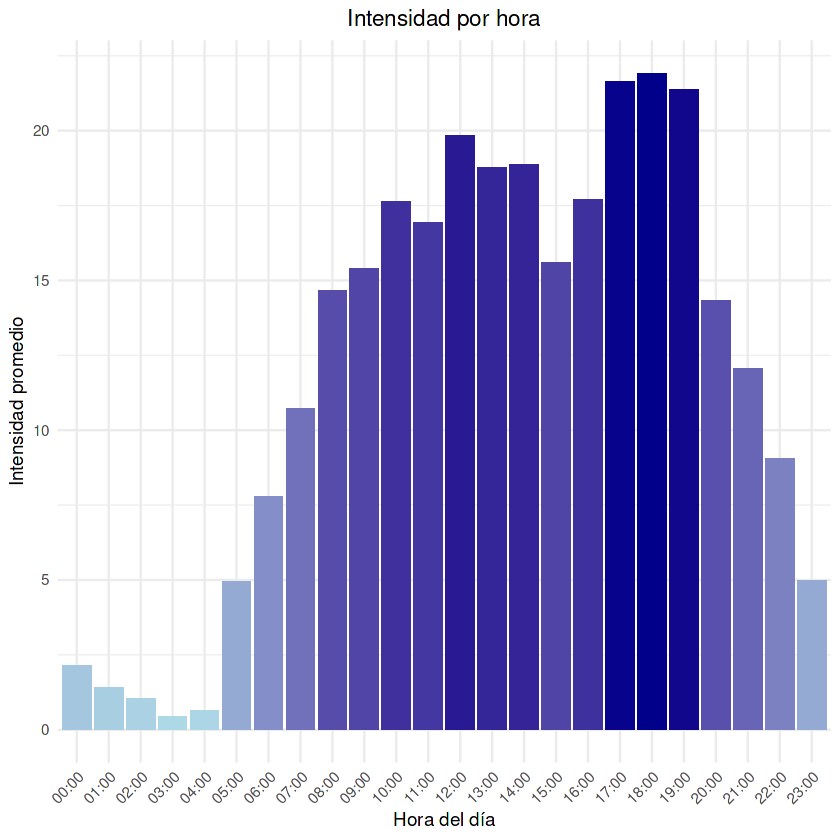

In [9]:
Relacion_intensidad_hora <- Intensidad_hora %>%
  group_by(time) %>%
  summarise(promedio_intensity = mean(TotalIntensity, na.rm = TRUE))

ggplot(Relacion_intensidad_hora, aes(x = time, y = promedio_intensity, fill = promedio_intensity)) +
  geom_bar(stat = "identity") +
  labs(title = "Intensidad por hora", x = "Hora del día", y = "Intensidad promedio") +
  theme_minimal() +
  theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)) +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_fill_gradient(low = "lightblue", high = "darkblue")

Al verificar la intensidad de la actividad a lo largo del día podemos observar una correlación positiva con el consumo de calorías. El rango de actividad intensa se sitúa entre las 17 y las 19 horas.

**Tiempo en la cama vs tiempo durmiendo**

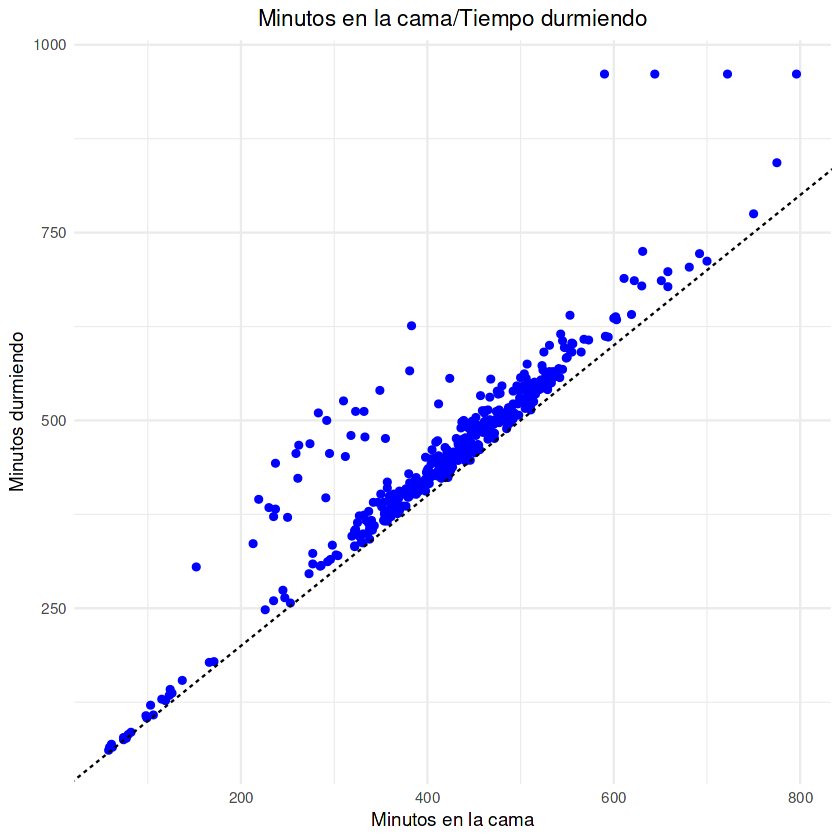

In [10]:
ggplot(Reposo, aes(x = TotalMinutesAsleep, y = TotalTimeInBed)) +
  geom_point(stat = "identity", color = "blue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "black") +
  labs(title = "Minutos en la cama/Tiempo durmiendo", x = "Minutos en la cama", y = "Minutos durmiendo") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

Observando la comparación gráfica concluimos que si bien existe un grueso de casos donde la relación es aceptable, eliminando el desfasaje, la calidad de sueño de los usuarios podría mejorar ampliamente.

# **Conclusión y recomendaciones**

Luego que recorrer los distintos conjuntos de datos asociados al uso de dispositivos de registro de actividad, concluimos que el público objetivo de nuestros productos se encuentra en el promedio de la población femenina. ¿A qué nos referimos con el promedio de la población? A aquellas mujeres que realizan cotidianamente actividades laborales/domésticas en mayor medida sedentarias, no incluyen en su día a día actividad física intensa, pero pretenden monitorear y elevar esos niveles para acceder a una mejor calidad de vida.

Para el desarrollo y mejora de nuestros productos, proponemos:

* Incluir recordatorio de movimiento luego de un determinado período de tiempo en reposo.

* Incluir recomendaciones personalizadas de objetivos, de acuerdo al usuario (según edad, sexo, nivel de actividad física, peso y metas de salud), para elevar los promedios de pasos/actividad.

* Incluir notificaciones de recordatorio de actividad física (se sugiere que se establezca cerca de la franja horaria 17 - 19 horas).

* Indicar niveles sugeridos de gasto calórico de acuerdo a la dieta registrada por el usuario.

* Agregar funcionalidad donde el usuario indique su periodo de descanso ideal (horarios/tiempo total). A raíz de esto, enviar notificaciones cuando se aproxima la hora de descanso, sugiriendo disminuir el uso de dispositivos electrónicos (smartphone, tv, etc) y recomendando la realización de actividades relajantes para disminuir el tiempo en la cama y tener un sueño más reparador (calidad/tiempo).